In [2]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split

In [3]:
images = np.load('images.npy')

In [4]:
print(type(images))

<class 'numpy.ndarray'>


In [5]:
images[0]

array([[[16, 18, 15],
        [18, 20, 15],
        [16, 17, 12],
        ...,
        [ 6,  6,  4],
        [ 9,  9,  7],
        [ 6,  6,  4]],

       [[19, 24, 20],
        [23, 25, 20],
        [17, 18, 13],
        ...,
        [ 8,  5,  3],
        [10,  8,  6],
        [ 6,  6,  4]],

       [[17, 22, 18],
        [21, 24, 19],
        [17, 18, 13],
        ...,
        [ 8,  4,  3],
        [11,  8,  7],
        [ 7,  6,  4]],

       ...,

       [[17, 14,  7],
        [18, 17,  9],
        [15, 14,  7],
        ...,
        [ 2,  4,  0],
        [ 3,  5,  0],
        [ 5,  7,  2]],

       [[22, 14, 11],
        [19, 14,  8],
        [12,  9,  3],
        ...,
        [ 4,  7,  0],
        [ 6,  9,  2],
        [ 7, 10,  3]],

       [[30, 12, 11],
        [31, 14,  8],
        [24,  9,  2],
        ...,
        [ 8, 11,  3],
        [11, 14,  6],
        [12, 15,  7]]], dtype=uint8)

In [6]:
labels = np.load('labels.npy')

In [7]:
print(type(labels))

<class 'numpy.ndarray'>


In [43]:
print(np.unique(labels))

[0 1 2 3 4 5 6 7 8 9]


In [8]:
labels[0]

2

In [12]:
images[0].shape

(69, 69, 3)

In [13]:
images.shape

(21785, 69, 69, 3)

In [23]:
X_train, X_test, Y_train, Y_test = train_test_split(images,labels,test_size = 0.2, random_state=2)

In [34]:
# scaling the data
X_train_scaled = X_train/255
X_test_scaled = X_test/255

In [35]:
print(X_train_scaled[0])

[[[0.05098039 0.04705882 0.03137255]
  [0.10196078 0.10196078 0.0745098 ]
  [0.10196078 0.10196078 0.06666667]
  ...
  [0.         0.01176471 0.        ]
  [0.00392157 0.01176471 0.        ]
  [0.         0.01176471 0.        ]]

 [[0.03529412 0.03529412 0.02352941]
  [0.06666667 0.06666667 0.04313725]
  [0.0745098  0.0745098  0.04313725]
  ...
  [0.         0.01176471 0.        ]
  [0.         0.01568627 0.        ]
  [0.00392157 0.00784314 0.        ]]

 [[0.01568627 0.01568627 0.00784314]
  [0.03529412 0.03529412 0.01568627]
  [0.04705882 0.05098039 0.02352941]
  ...
  [0.         0.01568627 0.        ]
  [0.00784314 0.02352941 0.00784314]
  [0.02352941 0.02745098 0.01960784]]

 ...

 [[0.03921569 0.03921569 0.03137255]
  [0.05098039 0.05098039 0.04313725]
  [0.03529412 0.03529412 0.02745098]
  ...
  [0.03137255 0.02745098 0.01960784]
  [0.03137255 0.02745098 0.01960784]
  [0.01960784 0.01568627 0.00784314]]

 [[0.07843137 0.07058824 0.0627451 ]
  [0.05882353 0.05490196 0.04705882]


In [36]:
print(images.shape,X_train.shape,X_test.shape)

(21785, 69, 69, 3) (17428, 69, 69, 3) (4357, 69, 69, 3)


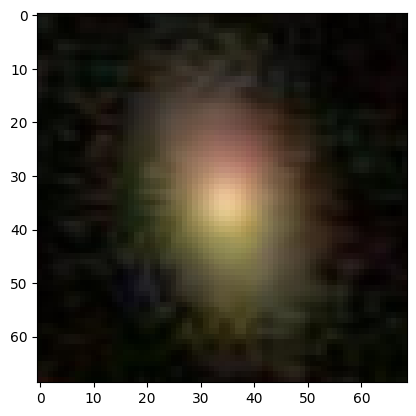

In [37]:
plt.imshow(images[0])
plt.show()

In [38]:
import tensorflow as tf
from tensorflow import keras
import cv2

In [39]:
num_of_classes = 10
model = keras.Sequential()

model.add(keras.layers.Conv2D(32,kernel_size = (3,3), activation='relu', input_shape=(69, 69, 3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Conv2D(64,kernel_size = (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation = 'relu'))
model.add(keras.layers.Dropout(0.5)) # to reduce overfitting

model.add(keras.layers.Dense(64, activation = 'relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(num_of_classes, activation = 'softmax')) 

In [40]:
# compile the neural network
model.compile(optimizer = 'adam',
              loss='sparse_categorical_crossentropy', # numerical so sparse, vector then categorical
              metrics = ['acc'])

In [41]:
# training a neural network
history = model.fit(X_train_scaled,Y_train, validation_split=0.1, epochs=10)
# overfitting:- training accuracy will be high and validation accuracy will be low

Epoch 1/10
491/491 [==============================] - 62s 122ms/step - loss: 1.6416 - acc: 0.3385 - val_loss: 1.3204 - val_acc: 0.4085
Epoch 2/10
491/491 [==============================] - 59s 121ms/step - loss: 1.3606 - acc: 0.4315 - val_loss: 1.2133 - val_acc: 0.4877
Epoch 3/10
491/491 [==============================] - 60s 122ms/step - loss: 1.2666 - acc: 0.4801 - val_loss: 1.1384 - val_acc: 0.5152
Epoch 4/10
491/491 [==============================] - 64s 130ms/step - loss: 1.2016 - acc: 0.5181 - val_loss: 1.1154 - val_acc: 0.5508
Epoch 5/10
491/491 [==============================] - 62s 127ms/step - loss: 1.1464 - acc: 0.5369 - val_loss: 1.0566 - val_acc: 0.5617
Epoch 6/10
491/491 [==============================] - 62s 126ms/step - loss: 1.0992 - acc: 0.5712 - val_loss: 1.0131 - val_acc: 0.6030
Epoch 7/10
491/491 [==============================] - 61s 123ms/step - loss: 1.0574 - acc: 0.5839 - val_loss: 0.9903 - val_acc: 0.6116
Epoch 8/10
491/491 [==============================] - 3

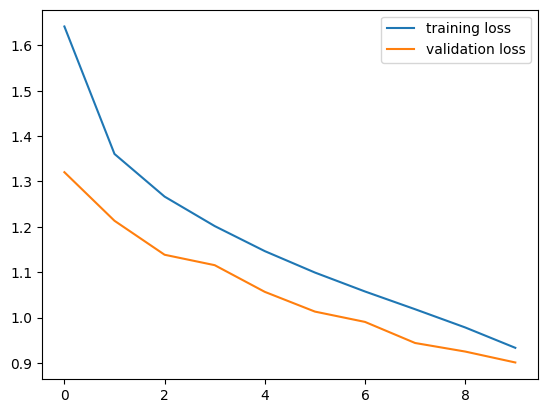

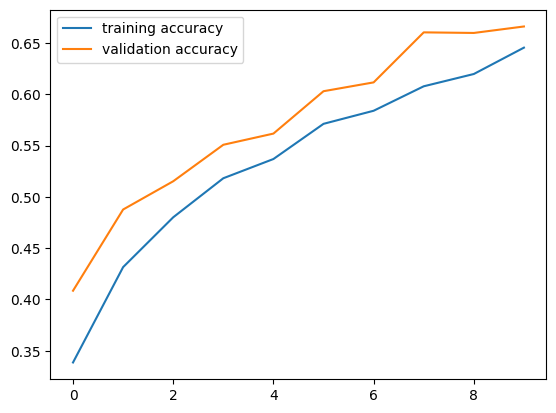

In [42]:
h = history

# plot the loss value
plt.plot(h.history['loss'],label='training loss')
plt.plot(h.history['val_loss'],label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'],label='training accuracy')
plt.plot(h.history['val_acc'],label='validation accuracy')
plt.legend()
plt.show()

In [ ]:
input_image_path = input('Path of the image to be predicted')

img = mpimg.imread(input_image_path)
imgplt = plt.imshow(img)
plt.show()

input_image_resized = cv2.resize(img,(69,69))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled,[1,69,69,3])

print(input_image_reshaped)

input_pred_label = np.argmax(input_image_reshaped)

print(input_pred_label)